## Movie Review Text classification using LSTM

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional
from keras.datasets import imdb

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 0s 0us/step


Feature Extraction

Since we have text data in x_train and x_test of having an uneven length. Our goal is to convert this text data into a numerical form in order to feed it into the model.

Make the length of texts equal using padding.

We are defining max_len = 200. If a sentence is having a length greater than 200 it will be trimmed off otherwise it will be padded by 0.

In [ ]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train.shape, y_train.shape

((25000, 200), (25000,))

In [ ]:
x_test.shape, y_test.shape

((25000, 200), (25000,))

In [ ]:
n_unique_words = 10000

model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length = max_len))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

input_length = maxlen Since we have already made all sentences in our dataset have an equal length of 200 using pad_sequence.

The Embedding layer takes n_unique_words as the size of the vocabulary in our dataset which we already declared as 10000.

After the Embedding layer, we are adding Bi-directional LSTM units. Using sigmoid activation and then compiling the model

Training the model

We have prepared our dataset and model not calling the fit method to train our model.

In [ ]:
batch_size = 250

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs = 12,
                    validation_data = [x_test, y_test])
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/12
100/100 [==============================] - 30s 235ms/step - loss: 0.4877 - accuracy: 0.7572 - val_loss: 0.3247 - val_accuracy: 0.8649
Epoch 2/12
100/100 [==============================] - 10s 104ms/step - loss: 0.2463 - accuracy: 0.9077 - val_loss: 0.3084 - val_accuracy: 0.8724
Epoch 3/12
100/100 [==============================] - 8s 81ms/step - loss: 0.1767 - accuracy: 0.9368 - val_loss: 0.3355 - val_accuracy: 0.8672
Epoch 4/12
100/100 [==============================] - 7s 75ms/step - loss: 0.1369 - accuracy: 0.9528 - val_loss: 0.3617 - val_accuracy: 0.8645
Epoch 5/12
100/100 [==============================] - 7s 66ms/step - loss: 0.1104 - accuracy: 0.9616 - val_loss: 0.5364 - val_accuracy: 0.8492
Epoch 6/12
100/100 [==============================] - 7s 68ms/step - loss: 0.0881 - accuracy: 0.9707 - val_loss: 0.4831 - val_accuracy: 0.8501
Epoch 7/12
100/100 [==============================] - 5s 54ms/step - loss: 0.0866 - accuracy: 0.9709 - val_loss: 0.5675 - val_accuracy: 0.

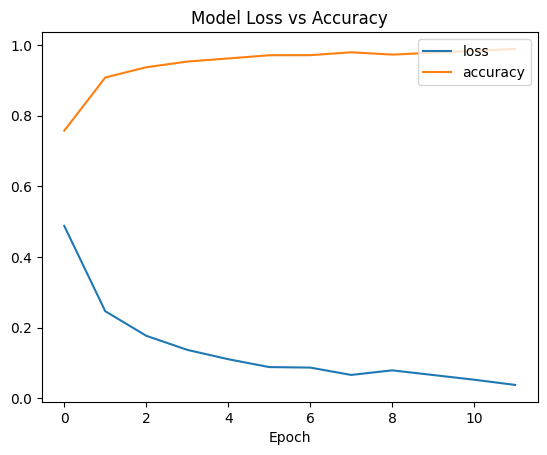

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title("Model Loss vs Accuracy")
plt.xlabel("Epoch")
plt.legend(['loss', 'accuracy'], loc = "upper right")
plt.show()
